### Rare event or Unbalanced data set

Providing equal sample of positive and negative instances to the classification algorithm will result in optimal result. Dataset which are highly skewed towards one or more classes have proven to be a challenge.

Resampling is a common practice of addressing this issue. Although there are many techniques within re-sampling, here we'll be learning the 3 most popular techniques.

* Random under-sampling - Reduce majority class to match minority class count
* Random over-sampling - Increase minority class by randomly picking samples within minority class till counts of both class match
* Synthetic Minority Over Sampling Technique (SMOTE) - Increase minority class by introducing synthetic examples through connecting all k (default = 5) minority class nearest negihbors using feature space similarity (Euclidean distance)

A number of techniques have been implemented in "imbalanced-learn" python package hosted at https://github.com/scikit-learn-contrib/imbalanced-learn. Follow the instructions in the link to install it, if not already installed.

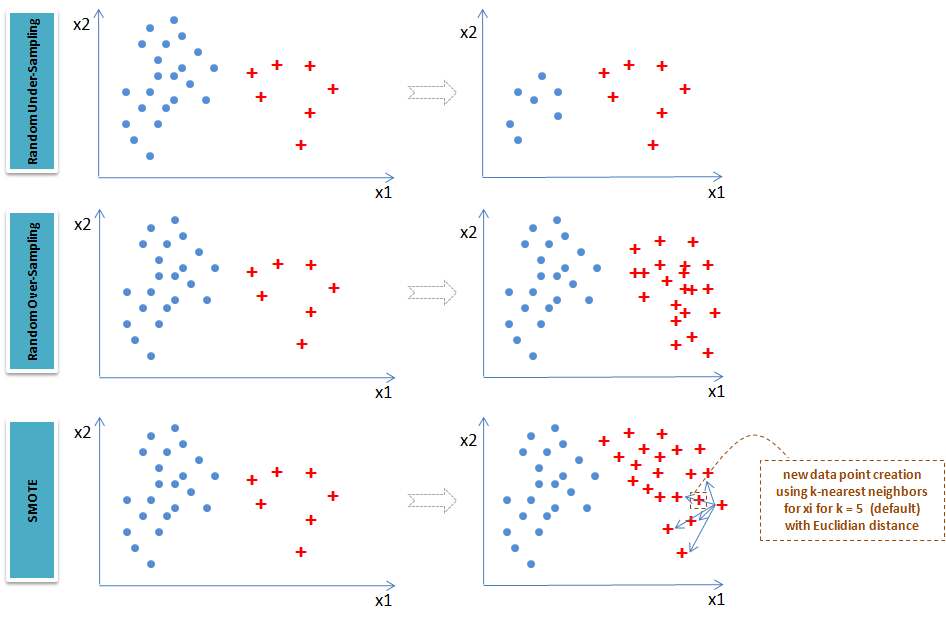

In [1]:
from IPython.display import Image
Image(filename='../Chapter 4 Figures/Sampling.png', width=800)

In [2]:
# Load libraries
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

C:\Users\Manoh\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
# Generate the dataset with 2 features to keep it simple 
X, y = make_classification(n_samples=5000, n_features=2, n_informative=2, 
                           n_redundant=0, weights=[0.9, 0.1], random_state=2017) 

print "Positive class: ", y.tolist().count(1)
print "Negative class: ", y.tolist().count(0)

Positive class:  514
Negative class:  4486


### Applying the sampling techniques

In [4]:
# Apply the random under-sampling
rus = RandomUnderSampler()
X_RUS, y_RUS = rus.fit_sample(X, y)

# Apply the random over-sampling
ros = RandomOverSampler()
X_ROS, y_ROS = ros.fit_sample(X, y)

# Apply regular SMOTE
sm = SMOTE(kind='regular')
X_SMOTE, y_SMOTE = sm.fit_sample(X, y)

### Plot the original vs re-sampled

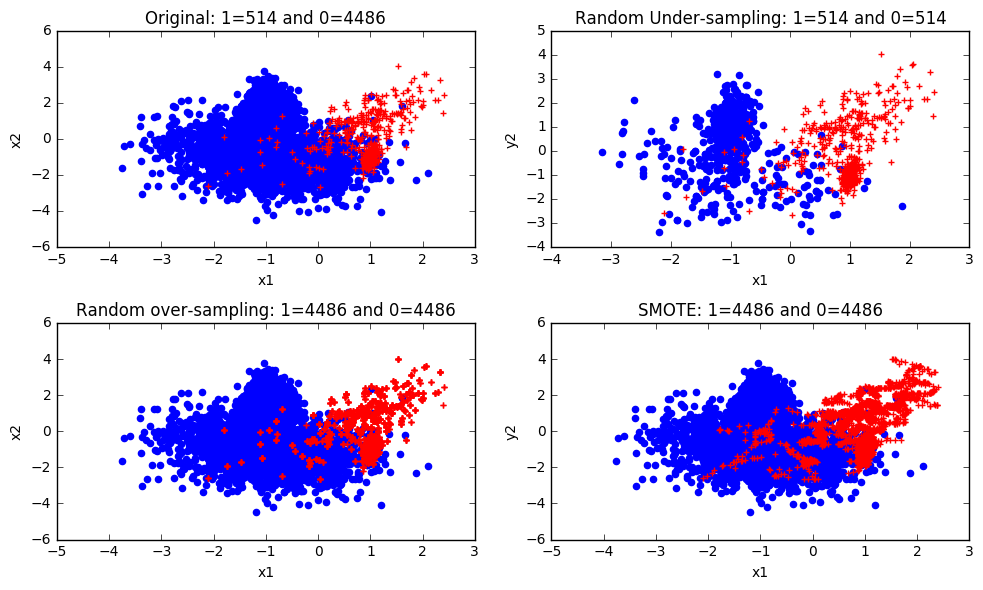

In [5]:
# Original vs resampled subplots
plt.figure(figsize=(10, 6))
plt.subplot(2,2,1)
plt.scatter(X[y==0,0], X[y==0,1], marker='o', color='blue')
plt.scatter(X[y==1,0], X[y==1,1], marker='+', color='red')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Original: 1=%s and 0=%s' %(y.tolist().count(1), y.tolist().count(0)))

plt.subplot(2,2,2)
plt.scatter(X_RUS[y_RUS==0,0], X_RUS[y_RUS==0,1], marker='o', color='blue')
plt.scatter(X_RUS[y_RUS==1,0], X_RUS[y_RUS==1,1], marker='+', color='red')
plt.xlabel('x1')
plt.ylabel('y2')
plt.title('Random Under-sampling: 1=%s and 0=%s' %(y_RUS.tolist().count(1), y_RUS.tolist().count(0)))

plt.subplot(2,2,3)
plt.scatter(X_ROS[y_ROS==0,0], X_ROS[y_ROS==0,1], marker='o', color='blue')
plt.scatter(X_ROS[y_ROS==1,0], X_ROS[y_ROS==1,1], marker='+', color='red')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Random over-sampling: 1=%s and 0=%s' %(y_ROS.tolist().count(1), y_ROS.tolist().count(0)))

plt.subplot(2,2,4)
plt.scatter(X_SMOTE[y_SMOTE==0,0], X_SMOTE[y_SMOTE==0,1], marker='o', color='blue')
plt.scatter(X_SMOTE[y_SMOTE==1,0], X_SMOTE[y_SMOTE==1,1], marker='+', color='red')
plt.xlabel('x1')
plt.ylabel('y2')
plt.title('SMOTE: 1=%s and 0=%s' %(y_SMOTE.tolist().count(1), y_SMOTE.tolist().count(0)))

plt.tight_layout()
plt.show()

### Known disadvantages:
* Random Under-Sampling rises opportunity for loss of information or concepts as we are reducing the majority class
* Random Over-Sampling & SMOTE can lead to overfitting issue due to multiple related instances

### Which re-sampling technique is the best?

Well, as always there is no one answer to this question! Let's try a quick classification model on 3 re-sampled data and compare the accuracy (we'll use AUC as this one of the best representation of model performance)



In [6]:
from sklearn import tree
from sklearn import metrics

# split data into train and test
from sklearn.cross_validation import train_test_split

X_RUS_train, X_RUS_test, y_RUS_train, y_RUS_test = train_test_split(X_RUS, y_RUS, test_size=0.3, random_state=2017)
X_ROS_train, X_ROS_test, y_ROS_train, y_ROS_test = train_test_split(X_ROS, y_ROS, test_size=0.3, random_state=2017)
X_SMOTE_train, X_SMOTE_test, y_SMOTE_train, y_SMOTE_test = train_test_split(X_SMOTE, y_SMOTE, test_size=0.3, random_state=2017)

# build a decision tree classifier
clf = tree.DecisionTreeClassifier(random_state=2017)
clf_rus = clf.fit(X_RUS_train, y_RUS_train)
clf_ros = clf.fit(X_ROS_train, y_ROS_train)
clf_smote = clf.fit(X_SMOTE_train, y_SMOTE_train)

# evaluate model performance
print "\nRUS - Train AUC : ",metrics.roc_auc_score(y_RUS_train, clf.predict(X_RUS_train))
print "RUS - Test AUC : ",metrics.roc_auc_score(y_RUS_test, clf.predict(X_RUS_test))
print "ROS - Train AUC : ",metrics.roc_auc_score(y_ROS_train, clf.predict(X_ROS_train))
print "ROS - Test AUC : ",metrics.roc_auc_score(y_ROS_test, clf.predict(X_ROS_test))
print "\nSMOTE - Train AUC : ",metrics.roc_auc_score(y_SMOTE_train, clf.predict(X_SMOTE_train))
print "SMOTE - Test AUC : ",metrics.roc_auc_score(y_SMOTE_test, clf.predict(X_SMOTE_test))


RUS - Train AUC :  0.988945248974
RUS - Test AUC :  0.983964646465
ROS - Train AUC :  0.985666951094
ROS - Test AUC :  0.986630288452

SMOTE - Train AUC :  1.0
SMOTE - Test AUC :  0.956132695918


### Conclusion

Here random over sampling is performing better on both train and test sets. As a best practice, in real world use cases it is recommended to look at other matrics (such as confusion matrix) and apply business context or domain knowledge to assess true performance of model.  